In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

### 데이터 설명
- TurbID - 발전기 ID
- Day - 날짜
- Tmstamp - 시간
- Wspd - 풍속
- Wdir - 터빈이 바라보는 각도와 실제 바람 방향 각도 차이
- Etmp - 외부 온도
- Itmp - 터빈 내부 온도
- Ndir - 터빈이 바라보는 방향 각도
- Pab - 터빈 당 3개의 날이 있으며 각각의 각도가 다름
- Prtv - 무효전력 : 에너지원을 필요로  하지 않는 전력
- Patv - 유효전력 : 실제로 터빈을 돌리는 일을 하는 전력 <br><br>

* <b>label: Patv </b>
결론적으로 134개 터빈의 201~202일, 즉 2일간의 Patv값을 예측해야 합니다.

In [13]:
df = pd.read_csv("data/train_data.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [14]:
df.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


<AxesSubplot:>

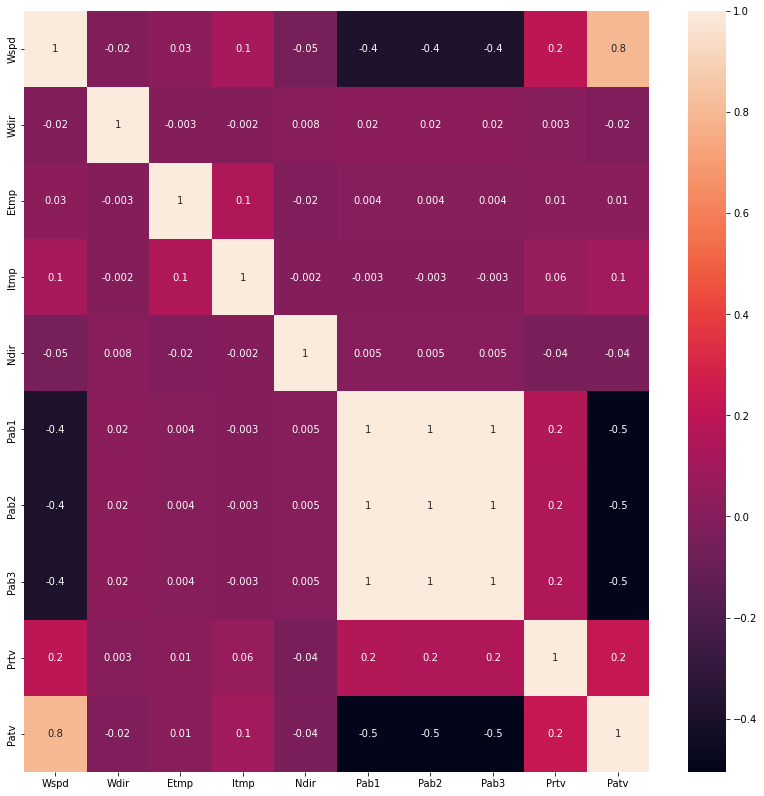

In [15]:
# feature간 상관도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

X_features = df.drop(['TurbID','Day'], axis=1)
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

# Wspd Itmp가 영향도가 높음
# Wspd > Pab1,2,3 > Prtv > Itmp > Ndir > Wdir > Etmp

### 결측치 분석

In [16]:
TurbList = []
for i in (sorted(pd.unique(df["TurbID"]))):
    tmp = df[df["TurbID"] == i]
    tmp.reset_index(inplace=True)
    TurbList.append(tmp)

### 결측치 
- 터빈1 [9356:9585] 314개 == 2일 4시간 40분 연속치
- 터빈2 [9356:9601] 355개 == 2일 11시간 30분 연속치

In [ ]:
testdata = TurbList[1]#.iloc[9356:9601]

In [ ]:
import matplotlib.pyplot as plt 
for i,testdata in enumerate(TurbList):
    plt.figure(figsize=(20,4), dpi=500)
    plt.yticks(np.arange(0.5, len(testdata.columns), 1), testdata.columns)
    plt.xticks(np.arange(0, len(testdata.index), len(testdata.index)//20), testdata.index[::int(len(testdata.index)/20)], rotation=90)
    plt.gca().invert_yaxis()
    plt.inferno()
    plt.grid(False)
    plt.pcolor(testdata.transpose().isna())
    plt.savefig(f'./nan/TurbID{i+1}.png', bbox_inches='tight', pad_inches=0)

### Submission 비교

In [247]:
b1 = pd.read_csv("Baseline1.csv")
b2 = pd.read_csv("Baseline2.csv")
b1_back = pd.read_csv("Baseline1.csv")

In [253]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(b1["Patv"], b2["Patv"])

718.705501069304

In [251]:
zero = 0
for i in sorted(pd.unique(df["TurbID"])):
    zero += len(b1[(b1["TurbID"] == i) & (b1["Patv"] == 0)])
zero

111

In [250]:
for i in sorted(pd.unique(df["TurbID"])):
    tmp = b1[b1["TurbID"] == i]
    index = b1[(b1["TurbID"] == i) & (b1["Patv"] == 0)].index
    #b1.loc[index,'Patv'] = tmp["Patv"].describe()[4]
    b1.loc[index,'Patv'] = tmp["Patv"].quantile(q=0.30)
    #print()

In [238]:
b1.to_csv('Baseline1_fill_0_q2%.csv', index=False)